In [1]:
!pip install lifelines

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sklearn.preprocessing import OrdinalEncoder

In [3]:
df = pd.read_csv("C:/Users/Asus/OneDrive/Desktop/dataset/cirrhosis.csv")

In [4]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [5]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [6]:
df.shape

(418, 20)

Attribute Information 
1) ID: unique identifier
2) N_Days: number of days between registration and the earlier of death, transplantation, or study analysis time in July 1986 
3) Status: status of the patient C (censored), CL (censored due to liver tx), or D (death)
4) Drug: type of drug D-penicillamine or placebo 
5) Age: age in [days]
6) Sex: M (male) or F (female) 
7) Ascites: presence of ascites N (No) or Y (Yes)
8) Hepatomegaly: presence of hepatomegaly N (No) or Y (Yes)
9) Spiders: presence of spiders N (No) or Y (Yes) 
10) Edema: presence of edema N (no edema and no diuretic therapy for edema), S (edema present without diuretics, or edema resolved by diuretics), or Y (edema despite diuretic therapy)
11) Bilirubin: serum bilirubin in [mg/dl] 
12) Cholesterol: serum cholesterol in [mg/dl]
13) Albumin: albumin in [gm/dl]
14) Copper: urine copper in [ug/day]
15) Alk_Phos: alkaline phosphatase in [U/liter] 
16) SGOT: SGOT in [U/ml]
17) Triglycerides: triglicerides in [mg/dl] 
18) Platelets: platelets per cubic [ml/1000] 
19) Prothrombin: prothrombin time in seconds [s] 
20) Stage: histologic stage of disease (1, 2, 3, or 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [8]:
df.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

Using OrdinalEncoder to convert object into int data type

In [9]:
X=df.dtypes=='object'
object_columns=list(X[X].index)
object_columns

['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']

In [10]:
label_df=df.copy()
ordinal_encoder=OrdinalEncoder()
label_df[object_columns]=ordinal_encoder.fit_transform(df[object_columns])

In [11]:
print(label_df.dtypes)

ID                 int64
N_Days             int64
Status           float64
Drug             float64
Age                int64
Sex              float64
Ascites          float64
Hepatomegaly     float64
Spiders          float64
Edema            float64
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
dtype: object


In [12]:
label_df.tail()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
413,414,681,2.0,NaN,24472,0.0,NaN,NaN,NaN,0.0,1.2,NaN,2.96,NaN,NaN,NaN,NaN,174.0,10.9,3.0
414,415,1103,0.0,NaN,14245,0.0,NaN,NaN,NaN,0.0,0.9,NaN,3.83,NaN,NaN,NaN,NaN,180.0,11.2,4.0
415,416,1055,0.0,NaN,20819,0.0,NaN,NaN,NaN,0.0,1.6,NaN,3.42,NaN,NaN,NaN,NaN,143.0,9.9,3.0
416,417,691,0.0,NaN,21185,0.0,NaN,NaN,NaN,0.0,0.8,NaN,3.75,NaN,NaN,NaN,NaN,269.0,10.4,3.0
417,418,976,0.0,NaN,19358,0.0,NaN,NaN,NaN,0.0,0.7,NaN,3.29,NaN,NaN,NaN,NaN,350.0,10.6,4.0


Data Cleaning for status column,  Status: status of the patient C (censored), CL (censored due to liver tx), or D (death). I am  converting C (censored) and  CL (censored due to liver tx) into single category

In [13]:
data = label_df
data["Status"] = data["Status"].map({0:0,1:0,2:1})
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,1,0.0,21464,0.0,1.0,1.0,1.0,2.0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,0,0.0,20617,0.0,0.0,1.0,1.0,0.0,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,1,0.0,25594,1.0,0.0,0.0,0.0,1.0,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,1,0.0,19994,0.0,0.0,1.0,1.0,1.0,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,0,1.0,13918,0.0,0.0,1.0,1.0,0.0,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


# MICE:Multivariate Imputation by Chained Equations

Implementing MICE to deal with null values

In [14]:
!pip install miceforest

Implementing MICE from miceforest creating 5 dataset and iteration for 3 times

In [15]:
import miceforest as mf
data_m=mf.ImputationKernel(data,datasets=5,save_all_iterations=True,random_state=11)

In [16]:
data_m.mice(3)

In [17]:
df_Cirrhosis=pd.concat([data_m.complete_data(i) for i in range(5)]).groupby(level=0).mean()

In [18]:
df_Cirrhosis.isnull().sum()

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64

# Fitting a Non-Parametric model-Kaplan Meier Curve

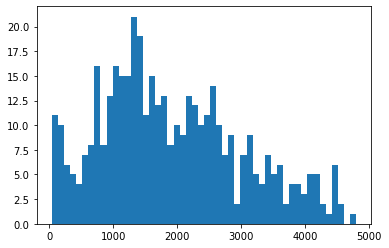

In [19]:
T = df_Cirrhosis["N_Days"]
E = df_Cirrhosis["Status"]
plt.hist(T,bins=50)
plt.show()

<AxesSubplot:xlabel='timeline'>

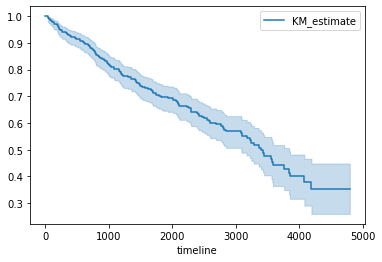

In [20]:
KMF = KaplanMeierFitter()
KMF.fit(durations=T, event_observed=E)
KMF.plot_survival_function()

<AxesSubplot:xlabel='timeline'>

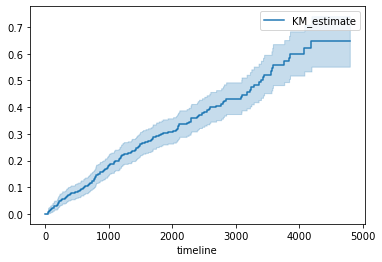

In [21]:
KMF.plot_cumulative_density()

Analysis of 50 percentage survival rate

In [22]:
from lifelines.utils import median_survival_times

median = KMF.median_survival_time_
median_confidence_interval = median_survival_times(KMF.confidence_interval_)
print(median)
print(median_confidence_interval)

3395.0
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                  3086.0                  3839.0


Text(0.5, 1.0, 'Survival of different gender group')

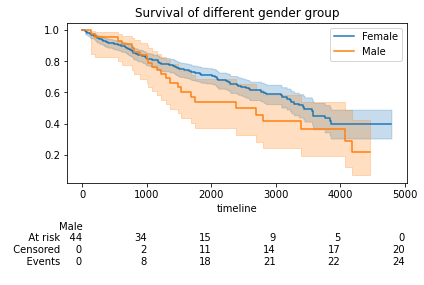

In [23]:
ax = plt.subplot(111)

f = (df_Cirrhosis["Sex"]==0)
KMF.fit(durations=T[f], event_observed=E[f], label="Female")
KMF.plot_survival_function(ax=ax)

KMF.fit(T[~f], event_observed=E[~f], label="Male")
KMF.plot_survival_function(ax=ax, at_risk_counts=True)

plt.title("Survival of different gender group")

# Fitting Cox Proportional Hazard Model

Hazard and Hazard Ratio

In [24]:
df_Cirrhosis['Ascites'].value_counts()

0.0    389
1.0     24
0.2      3
0.8      2
Name: Ascites, dtype: int64

In [25]:
df_Cirrhosis['Hepatomegaly'].value_counts()

1.0    195
0.0    188
0.8     10
0.6     10
0.2      8
0.4      7
Name: Hepatomegaly, dtype: int64

In [27]:
df_Cirrhosis['Edema'].value_counts()

0.0    354
1.0     44
2.0     20
Name: Edema, dtype: int64

In [28]:
dummies_Ascites = pd.get_dummies(df_Cirrhosis['Ascites'], prefix='Ascites')

In [29]:
dummies_Ascites.head(4)

,Ascites_0.0,Ascites_0.2,Ascites_0.8,Ascites_1.0
0,0,0,0,1
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0


In [30]:
dummies_Ascites = dummies_Ascites[["Ascites_0.0","Ascites_1.0"]]

In [31]:
df_Ascites = pd.concat([df_Cirrhosis,dummies_Ascites],axis=1)
df_Ascites.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,...,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Ascites_0.0,Ascites_1.0
0,1.0,400.0,1.0,0.0,21464.0,0.0,1.0,1.0,1.0,2.0,...,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0,1
1,2.0,4500.0,0.0,0.0,20617.0,0.0,0.0,1.0,1.0,0.0,...,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1,0
2,3.0,1012.0,1.0,0.0,25594.0,1.0,0.0,0.0,0.0,1.0,...,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0,1,0
3,4.0,1925.0,1.0,0.0,19994.0,0.0,0.0,1.0,1.0,1.0,...,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,1,0
4,5.0,1504.0,0.0,1.0,13918.0,0.0,0.0,1.0,1.0,0.0,...,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1,0


In [32]:
df_Ascites.drop(columns=['Bilirubin','Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides'], inplace=True)

In [33]:
print(df_Ascites.columns)


Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Platelets', 'Prothrombin', 'Stage',
       'Ascites_0.0', 'Ascites_1.0'],
      dtype='object')


In [34]:
cph = CoxPHFitter()
cph.fit(df_Ascites, duration_col = 'N_Days', event_col = 'Status')

cph.print_summary()

<lifelines.CoxPHFitter: fitted with 418 total observations, 257 right-censored observations>
             duration col = 'N_Days'
                event col = 'Status'
      baseline estimation = breslow
   number of observations = 418
number of events observed = 161
   partial log-likelihood = -792.74
         time fit was run = 2024-04-20 15:55:53 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
ID            -0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Drug           0.12       1.12       0.18            -0.24             0.47                 0.79                 1.61
Age            0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
Sex            0.16       1.17       0.24            -0.32             0.63                 0.73                 1.88
Ascites       -1.38       0.25       2.06            -5.42             2.66                 0.00                14.25
Hepatomegaly   0.65       1.91       0.22             0.21             1.08                 1.24                 2.94
Spiders        0.54       1.71       0.19             0.17             0.91                 1.18                 2.48
Edema          0.52       1.68       0.14             0.24             0.79                 1.27                 2.21
Platelets      0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
Prothrombin    0.24       1.27       0.07             0.10             0.37                 1.11                 1.45
Stage          0.27       1.30       0.12             0.02             0.51                 1.02                 1.66
Ascites_0.0   -1.33       0.26       1.03            -3.34             0.68                 0.04                 1.97
Ascites_1.0    0.95       2.59       1.40            -1.79             3.70                 0.17                40.38

               cmp to     z      p   -log2(p)
covariate                                    
ID               0.00 -0.08   0.94       0.09
Drug             0.00  0.64   0.52       0.93
Age              0.00  3.39 <0.005      10.48
Sex              0.00  0.65   0.51       0.96
Ascites          0.00 -0.67   0.50       0.99
Hepatomegaly     0.00  2.92 <0.005       8.17
Spiders          0.00  2.83 <0.005       7.75
Edema            0.00  3.69 <0.005      12.11
Platelets        0.00  0.56   0.58       0.80
Prothrombin      0.00  3.49 <0.005      11.00
Stage            0.00  2.13   0.03       4.93
Ascites_0.0      0.00 -1.30   0.19       2.36
Ascites_1.0      0.00  0.68   0.50       1.01
---
Concordance = 0.79
Partial AIC = 1611.47
log-likelihood ratio test = 161.47 on 13 df
-log2(p) of ll-ratio test = 89.70

Interpretation

<AxesSubplot:xlabel='log(HR) (95% CI)'>

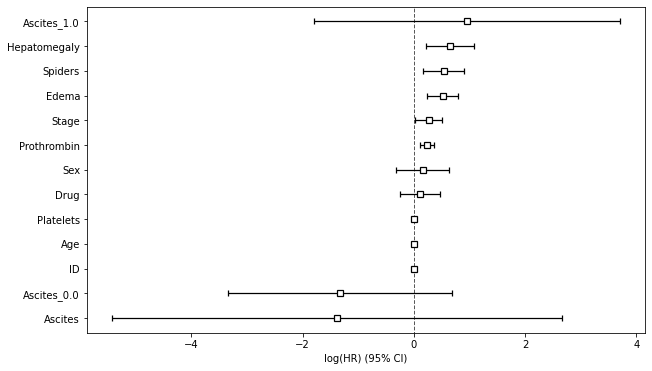

In [35]:
plt.subplots(figsize=(10,6))
cph.plot()

Text(0.5, 1.0, 'Ascites plot')

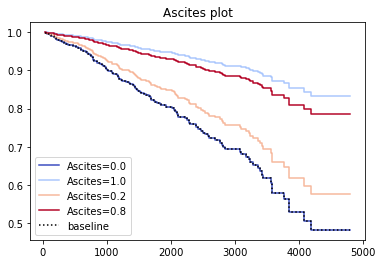

In [36]:
cph.plot_partial_effects_on_outcome(covariates='Ascites', values=[0.0, 1.0, 0.2, 0.8], cmap="coolwarm")
plt.title("Ascites plot")

Text(0.5, 1.0, 'Hepatomegaly plot')

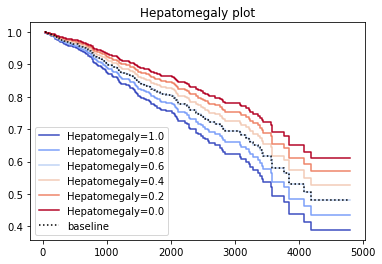

In [37]:
cph.plot_partial_effects_on_outcome(covariates='Hepatomegaly', values=[1.0, 0.8, 0.6, 0.4, 0.2, 0.0], cmap="coolwarm")
plt.title("Hepatomegaly plot")